In [65]:
import pandas as pd
from ipywidgets import widgets, interact
import matplotlib.pyplot as plt

doctors=pd.read_csv('doctor.csv',index_col = "IDdoctor")
doctors

,surnameOfDoctor,IDdepartment
IDdoctor,,
1,Stepanyk,1
2,Chushak,1
3,Seredny,2
4,Stetsyshyn,2
5,Buchko,3
6,Sorak,3
7,Senuik,4


In [54]:
departments=pd.read_csv('department.csv',index_col = "IDdepartment")
departments       

,nameOfDep,taryf
IDdepartment,,
1,kardio,150
2,gastro,140
3,surgery,200
4,dermo,300


In [55]:
reports=pd.concat([pd.read_csv('report1.csv'),pd.read_csv('report2.csv')])
reports

,date,surnameOfPatient,IDdoctor,time
0,01.12.2023,Galuik,1,2.0
1,02.12.2023,Petrenko,1,1.0
2,02.12.2023,Mukha,4,3.0
3,03.12.2023,Dybnyk,5,1.5
0,04.12.2023,Lovare,3,0.5
1,04.12.2023,Moroz,6,4.0
2,05.12.2023,Asus,7,1.0
3,05.12.2023,Asus,7,1.0


In [56]:
table=reports.join(doctors,on="IDdoctor").join(departments,on="IDdepartment")
table

,date,surnameOfPatient,IDdoctor,time,surnameOfDoctor,IDdepartment,nameOfDep,taryf
0,01.12.2023,Galuik,1,2.0,Stepanyk,1,kardio,150
1,02.12.2023,Petrenko,1,1.0,Stepanyk,1,kardio,150
2,02.12.2023,Mukha,4,3.0,Stetsyshyn,2,gastro,140
3,03.12.2023,Dybnyk,5,1.5,Buchko,3,surgery,200
0,04.12.2023,Lovare,3,0.5,Seredny,2,gastro,140
1,04.12.2023,Moroz,6,4.0,Sorak,3,surgery,200
2,05.12.2023,Asus,7,1.0,Senuik,4,dermo,300
3,05.12.2023,Asus,7,1.0,Senuik,4,dermo,300


In [57]:
table['total']=table['time']*table['taryf']
table

,date,surnameOfPatient,IDdoctor,time,surnameOfDoctor,IDdepartment,nameOfDep,taryf,total
0,01.12.2023,Galuik,1,2.0,Stepanyk,1,kardio,150,300.0
1,02.12.2023,Petrenko,1,1.0,Stepanyk,1,kardio,150,150.0
2,02.12.2023,Mukha,4,3.0,Stetsyshyn,2,gastro,140,420.0
3,03.12.2023,Dybnyk,5,1.5,Buchko,3,surgery,200,300.0
0,04.12.2023,Lovare,3,0.5,Seredny,2,gastro,140,70.0
1,04.12.2023,Moroz,6,4.0,Sorak,3,surgery,200,800.0
2,05.12.2023,Asus,7,1.0,Senuik,4,dermo,300,300.0
3,05.12.2023,Asus,7,1.0,Senuik,4,dermo,300,300.0


In [70]:
total_table = table.groupby(['IDdoctor', 'surnameOfDoctor'])['total'].sum().reset_index()
total_table

,IDdoctor,surnameOfDoctor,total
0,1,Stepanyk,450.0
1,3,Seredny,70.0
2,4,Stetsyshyn,420.0
3,5,Buchko,300.0
4,6,Sorak,800.0
5,7,Senuik,600.0


Text(0.5, 1.0, 'Кількість зарплати')

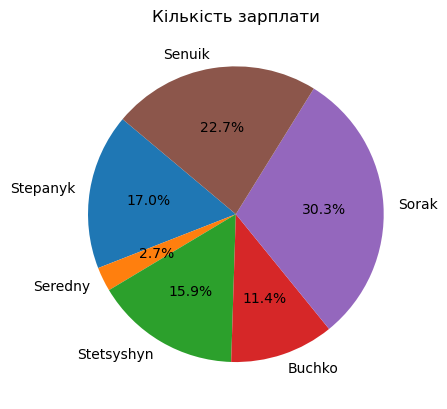

In [76]:
plt.pie(total_table['total'], labels=total_table['surnameOfDoctor'], autopct='%1.1f%%', startangle=140)
plt.title('Кількість зарплати')

In [60]:
dep_table = table[['surnameOfDoctor', 'nameOfDep','total']].groupby(['nameOfDep', 'surnameOfDoctor']).sum()
dep_table

total
nameOfDep surnameOfDoctor       
dermo     Senuik           600.0
gastro    Seredny           70.0
          Stetsyshyn       420.0
kardio    Stepanyk         450.0
surgery   Buchko           300.0
          Sorak            800.0

In [61]:
dep_table_2 = table[['nameOfDep','total']].groupby(['nameOfDep']).sum()
dep_table_2

,total
nameOfDep,
dermo,600.0
gastro,490.0
kardio,450.0
surgery,1100.0


In [62]:
def get_total_by_dep(dep_type):
    try:
        print(f"money of {dep_type} = {dep_table_2.loc[dep_type, 'total']}")
    except KeyError:
        print(f"No data for {dep_type}")

choice_type = dep_table_2.index.tolist()
summary_widgets = widgets.interact(get_total_by_dep, dep_type=choice_type)

interactive(children=(Dropdown(description='dep_type', options=('dermo', 'gastro', 'kardio', 'surgery'), value…

In [63]:
total_table = table.groupby(['date', 'surnameOfPatient'])['total'].sum().reset_index()
total_table

,date,surnameOfPatient,total
0,01.12.2023,Galuik,300.0
1,02.12.2023,Mukha,420.0
2,02.12.2023,Petrenko,150.0
3,03.12.2023,Dybnyk,300.0
4,04.12.2023,Lovare,70.0
5,04.12.2023,Moroz,800.0
6,05.12.2023,Asus,600.0
